In [0]:

import pandas as pd

import seaborn as sns


In [78]:
from google.colab import files 

uploaded = files.upload()



Saving gastos-stefano 1_01_2019 - 31_04_2019 - con tarjeta.csv to gastos-stefano 1_01_2019 - 31_04_2019 - con tarjeta (2).csv


In [0]:
import io

df = pd.read_csv(io.BytesIO(uploaded['gastos-stefano 1_01_2019 - 31_04_2019 - con tarjeta.csv']))



# Removing NAN

In [0]:


df.drop("Estado" , inplace = True , axis = 1)
df.dropna(thresh = 2, inplace = True )

# Transforming dates 

In [351]:
def separatestringcolum(df,originalcolumn,newcolum1,newcolum2,separator):
    
    "this function, on the other hand, will separate a column which elements \
    are strings , into two new colums with those strings. The arguments are \
    df as the dataframe, originalcolumn, being the column that we are going to split\
    newcolum1 is the name of the new created column that will have elements to the left\
    of the separator , and newcolumn2 the name of the second column, including the elements to \
    the right of the separator. Separator is a string specifying the element we will use to\
    separate"
    
    
    df[newcolum1], df[newcolum2] = df[originalcolumn].str.split(separator, 1).str
    
    return(df)





df= separatestringcolum(df,"Tabla de movimientos de la cuenta {0} Fecha", "Fecha", "residuo" , " ") # Separando con espacio


df.drop(["Tabla de movimientos de la cuenta {0} Fecha","residuo", "Saldo"]  , inplace = True , axis = 1)

df.head()

,Concepto,Importe,Tipo de gasto,Mes,Fecha
0,Balsamiq trid1042692,"Ver detalle -8,29 €",apps,Abril,30
2,Adeudo de iberdrola Adeudo nº 2019113001362565...,-74.68,"electricidad , agua",Abril,30
4,E.s. motilla,"Ver detalle -39,99 €",gasolina y parking necesario,Abril,29
6,La tienda della nonna,"Ver detalle -8,55 €",caprichos,Abril,29
8,Seitt-r3r5tronco argan. s,"Ver detalle -2,35 €",impuestos sorpresa,Abril,29


In [352]:


df.loc[df['Mes'] == 'Abril', 'Fecha'] =  df["Fecha"].astype(str) + '/04/2019'
df.loc[df['Mes'] == 'Marzo', 'Fecha'] =  df["Fecha"].astype(str) + '/03/2019'
df.loc[df['Mes'] == 'Febrero', 'Fecha'] =  df["Fecha"].astype(str) + '/02/2019'
df.loc[df['Mes'] == 'Enero', 'Fecha'] =  df["Fecha"].astype(str) + '/01/2019'

df

,Concepto,Importe,Tipo de gasto,Mes,Fecha
0,Balsamiq trid1042692,"Ver detalle -8,29 €",apps,Abril,30/04/2019
2,Adeudo de iberdrola Adeudo nº 2019113001362565...,-74.68,"electricidad , agua",Abril,30/04/2019
4,E.s. motilla,"Ver detalle -39,99 €",gasolina y parking necesario,Abril,29/04/2019
6,La tienda della nonna,"Ver detalle -8,55 €",caprichos,Abril,29/04/2019
8,Seitt-r3r5tronco argan. s,"Ver detalle -2,35 €",impuestos sorpresa,Abril,29/04/2019
10,Seitt-r3r5tronco vical. s,"Ver detalle -0,95 €",impuestos sorpresa,Abril,29/04/2019
12,Con sazon,"Ver detalle -20,80 €",restaurantes,Abril,29/04/2019
14,Dominos pizza tres cantos,"Ver detalle -29,95 €",restaurantes,Abril,26/04/2019
16,L.h. - 143,"Ver detalle -11,35 €",restaurantes,Abril,26/04/2019
18,Area de servicios motilla,"Ver detalle -47,42 €",gasolina y parking necesario,Abril,26/04/2019


In [0]:
from datetime import datetime
df["Fecha"] = pd.to_datetime(df["Fecha"]) 

# Transforming expenses 

In [354]:

df= separatestringcolum(df,"Importe", "residuo", "gasto" , "-") # Separando con espacio


df.drop(["Importe","residuo"]  , inplace = True , axis = 1)

df.head()

,Concepto,Tipo de gasto,Mes,Fecha,gasto
0,Balsamiq trid1042692,apps,Abril,2019-04-30,"8,29 €"
2,Adeudo de iberdrola Adeudo nº 2019113001362565...,"electricidad , agua",Abril,2019-04-30,74.68
4,E.s. motilla,gasolina y parking necesario,Abril,2019-04-29,"39,99 €"
6,La tienda della nonna,caprichos,Abril,2019-04-29,"8,55 €"
8,Seitt-r3r5tronco argan. s,impuestos sorpresa,Abril,2019-04-29,"2,35 €"


In [0]:


df["gasto"] = df["gasto"].str.replace('€', '')  # remove euro sign
df["gasto"] = df["gasto"].str.replace(',', '.') # change commas for dots, to make sure we will be able to convert them to numeric 

df["gasto"] = df["gasto"].str.strip() # remove blank space 

In [0]:
df["gasto"] = pd.to_numeric(df["gasto"])

# Our data is ready!

In [360]:
df.dtypes


Concepto                  object
Tipo de gasto             object
Mes                       object
Fecha             datetime64[ns]
gasto                    float64
dtype: object

In [357]:
df

,Concepto,Tipo de gasto,Mes,Fecha,gasto
0,Balsamiq trid1042692,apps,Abril,2019-04-30,8.29
2,Adeudo de iberdrola Adeudo nº 2019113001362565...,"electricidad , agua",Abril,2019-04-30,74.68
4,E.s. motilla,gasolina y parking necesario,Abril,2019-04-29,39.99
6,La tienda della nonna,caprichos,Abril,2019-04-29,8.55
8,Seitt-r3r5tronco argan. s,impuestos sorpresa,Abril,2019-04-29,2.35
10,Seitt-r3r5tronco vical. s,impuestos sorpresa,Abril,2019-04-29,0.95
12,Con sazon,restaurantes,Abril,2019-04-29,20.80
14,Dominos pizza tres cantos,restaurantes,Abril,2019-04-26,29.95
16,L.h. - 143,restaurantes,Abril,2019-04-26,11.35
18,Area de servicios motilla,gasolina y parking necesario,Abril,2019-04-26,47.42


# Plotting barplots

<Figure size 1440x1440 with 0 Axes>

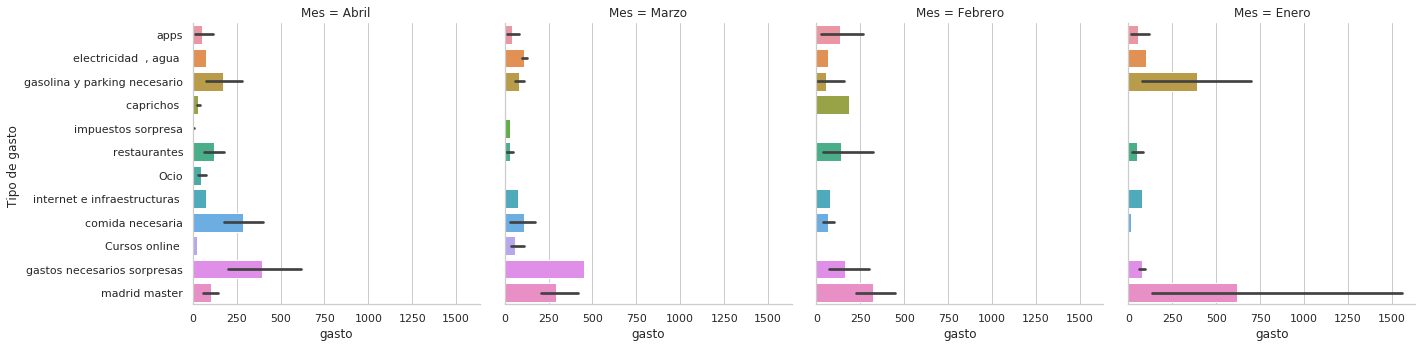

In [361]:
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")
plt.figure(figsize=(20,20))
b = sns.catplot(x="gasto", y="Tipo de gasto ",col = "Mes", data=df , kind = 'bar' , estimator = np.sum ) 

plt.tight_layout()
plt.show()

In [362]:
df.loc[df['Mes'] == 'Abril',].groupby(["Tipo de gasto "]).sum()


,gasto
Tipo de gasto,
Cursos online,23.98
Ocio,48.70
apps,53.24
caprichos,32.20
comida necesaria,284.49
"electricidad , agua",74.68
gasolina y parking necesario,174.25
gastos necesarios sorpresas,393.14
impuestos sorpresa,4.20


# Plot scatterplots 

In [374]:


df["Fecha"] = pd.to_datetime(df["Fecha"]).dt.strftime('%d-%m-%Y')
df

,Concepto,Tipo de gasto,Mes,Fecha,gasto
0,Balsamiq trid1042692,apps,Abril,30-04-2019,8.29
2,Adeudo de iberdrola Adeudo nº 2019113001362565...,"electricidad , agua",Abril,30-04-2019,74.68
4,E.s. motilla,gasolina y parking necesario,Abril,29-04-2019,39.99
6,La tienda della nonna,caprichos,Abril,29-04-2019,8.55
8,Seitt-r3r5tronco argan. s,impuestos sorpresa,Abril,29-04-2019,2.35
10,Seitt-r3r5tronco vical. s,impuestos sorpresa,Abril,29-04-2019,0.95
12,Con sazon,restaurantes,Abril,29-04-2019,20.80
14,Dominos pizza tres cantos,restaurantes,Abril,26-04-2019,29.95
16,L.h. - 143,restaurantes,Abril,26-04-2019,11.35
18,Area de servicios motilla,gasolina y parking necesario,Abril,26-04-2019,47.42


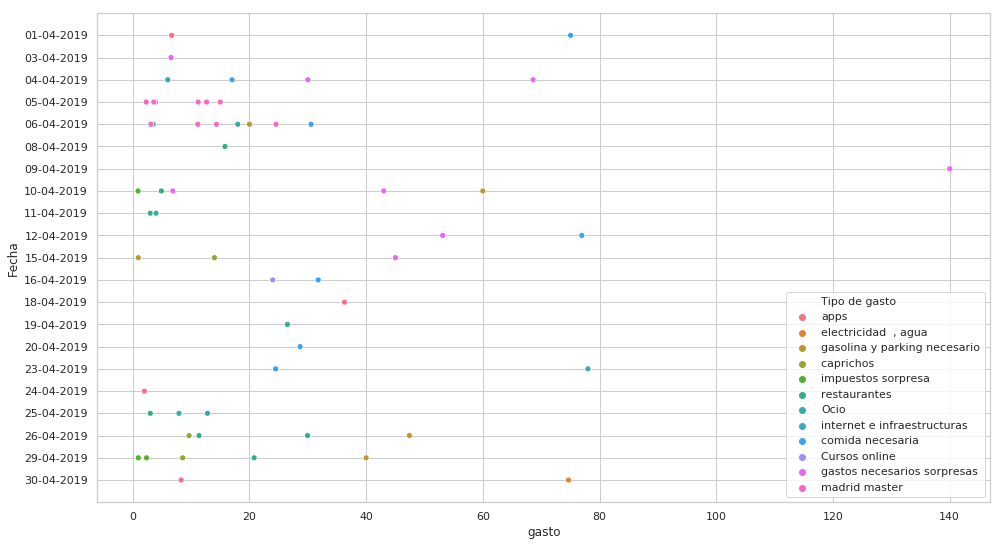

In [378]:
sns.scatterplot(x = "gasto", y = "Fecha" , hue = "Tipo de gasto " , data = df.loc[df['Mes'] == 'Abril'],estimator = np.sum)



